In [9]:
import symvec
from graph import *
import sympy
from sympy import *
kap, c2, c3, D = sympy.symbols('kappa c2 c3 D')
d, Kd = sympy.symbols('d K_d')
alpha, a = 0, 0
_q, _k, _p, dot_kq, dot_pk, dot_qp = sympy.symbols('q k p (k·q) (k·p) (q·p)')
_r, dot_qr, dot_pr, dot_rk = sympy.symbols('r (q·r) (p·r) (r·k)')


# assign symbol for dot product
symvec.dots[frozenset((_q,_k))] = dot_kq
symvec.dots[frozenset((_q,_p))] = dot_qp
symvec.dots[frozenset((_p,_k))] = dot_pk
symvec.dots[frozenset((_q,_r))] = dot_qr
symvec.dots[frozenset((_p,_r))] = dot_pr
symvec.dots[frozenset((_r,_k))] = dot_rk
# create vectors
k, q, p, r = symvec.Vector(_k), symvec.Vector(_q), symvec.Vector(_p), symvec.Vector(_r)

def f(x, alpha, a):
    return (kap*x**2+a)*x**alpha
def v2(k1,k2,k):
    expr = -c2*k**2
    return fraction(cancel((expr)))

def v3(k1,k2,k3,k):
    return (-c3*k**2,1)

def expand_vertex(expr, q):
    """
    Expands the coefficients of the renormalized 2-vertex
    Returns dictionary of the coefficients of the monomials
    """
    return symvec.all_coeffs(expr,[q.sym])

kapt, c1t, c2t, c3t, Dt = sympy.symbols('kappat c1t c2t c3t Dt')

def v22(k1,k2,k):
    expr = -c2t*k**2
    return fraction(cancel((expr)))

def v3t(k1,k2,k3,k):
    return (-c3t*k**2,1)

def compare_coeffs(dict1,dict_original,k,q,p):
    """
    Returns equations between the renormalized model parameters and the original model parameters
    """
    eqts = [0]*len(dict1)
    i=0
    for key in dict1:
        eqts[i]= dict1.get(key) - dict_original.get(key)
        i+=1
    eqts = [i for i in eqts if i != 0]
    return eqts

def renormalize_vertex(expr,vertex,k,q,p,d):
    """
    Matches the coefficients of the 2-vertex with the renormalized 2-vertex.
    """
    coeffs=expand_vertex(expr,q)
    coeffs_original = expand_vertex(vertex,q)
    eqts= compare_coeffs(coeffs,coeffs_original,k,q,p)
    if vertex == v2t(q,q,q):
        return list(linsolve(eqts, [c2t]))[0]
    elif vertex == v3t(q,q,q,q):
        return list(linsolve(eqts, [c3t]))[0]



## Propagator Corrections

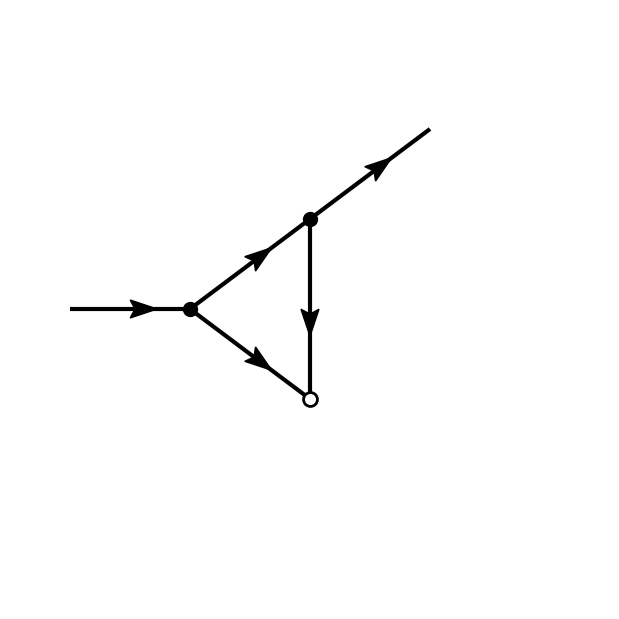

2*D*K_d*Lambda**d*c2**2*q**2*δl/(Lambda**2*kappa**2) - 3*D*K_d*Lambda**d*c3*q**2*δl/(Lambda**2*kappa)

In [11]:
# figure 2c
v = [Vertex() for i in range(3)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[1])
v[2].add_outgoing()
I_array = integrals_symmet(v, q, [q], f, D, k, alpha, a, v2, v3)
I2c = solve_integrals_symmet(I_array, k, [q], d, n=4)
v = [Vertex() for i in range(2)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[1])
v[0].add_outgoing()
I_array = integrals_symmet(v, q, [q], f, D, k, alpha, a, v2, v3)
I3b = solve_integrals_symmet(I_array, k, [q], d, n=4)
Iprop= I2c+I3b
display(Iprop)

## 2-Vertex Corrections

In [3]:
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[1].link_vertex(v[3])
v[2].link_vertex(v[3])
v[1].add_outgoing()
v[2].add_outgoing()
I_array = integrals_symmet(v, q, [p,q-p], f, D, k, alpha, a,  v2, v3)
Ia = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[3])
v[3].link_vertex(v[1])
v[2].add_outgoing()
v[3].add_outgoing()
I_array = integrals_symmet(v, q, [p,q-p], f, D, k, alpha, a,  v2, v3)
Ib = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
v = [Vertex() for i in range(3)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[1])
v[2].add_outgoing()
v[2].add_outgoing()
I_array = integrals_symmet(v, q, [p,q-p], f, D, k, alpha, a,  v2, v3)
Ic = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
v = [Vertex() for i in range(3)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[1])
v[0].add_outgoing()
v[2].add_outgoing()
I_array = integrals_symmet(v, q, [p,q-p], f, D, k, alpha, a,  v2, v3)
Id = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
I2vert = Ia+Ib+Ic+Id
display(I2vert)


-4*D*K_d*Lambda**d*c2**3*q**2*δl/(Lambda**2*kappa**3) + 9*D*K_d*Lambda**d*c2*c3*q**2*δl/(Lambda**2*kappa**2)

## 3-Vertex Corrections

In [7]:
# figure 3c
v = [Vertex() for i in range(3)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[1])
v[0].add_outgoing()
v[2].add_outgoing()
v[2].add_outgoing()
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a,  v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), (element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]))) for element in I_array]
I3c = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
# figure e
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[1].link_vertex(v[2])
v[0].link_vertex(v[3])
v[3].link_vertex(v[2])
v[0].add_outgoing()
v[1].add_outgoing()
v[3].add_outgoing()
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a,  v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), (element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]))) for element in I_array]
Ie = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
# figure f
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[3])
v[3].link_vertex(v[1])
v[0].add_outgoing()
v[2].add_outgoing()
v[3].add_outgoing()
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a,  v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), (element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]))) for element in I_array]
If = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
# figure g
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[1].link_vertex(v[2])
v[0].link_vertex(v[3])
v[3].link_vertex(v[2])
v[1].add_outgoing()
v[1].add_outgoing()
v[3].add_outgoing()
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a,  v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), (element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]))) for element in I_array]
Ig = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
# figure h
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[3])
v[3].link_vertex(v[1])
v[3].add_outgoing()
v[3].add_outgoing()
v[2].add_outgoing()
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a,  v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), (element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]))) for element in I_array]
Ih = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
# figure i
v = [Vertex() for i in range(4)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[3])
v[3].link_vertex(v[1])
v[2].add_outgoing()
v[2].add_outgoing()
v[3].add_outgoing()
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a,  v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), (element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]))) for element in I_array]
Ii = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
# figure j
v = [Vertex() for i in range(5)]
v[0].link_vertex(v[1])
v[1].link_vertex(v[2])
v[2].link_vertex(v[3])
v[0].link_vertex(v[4])
v[4].link_vertex(v[3])
v[1].add_outgoing()
v[2].add_outgoing()
v[4].add_outgoing()
I_array = integrals_symmet(v, q, [p,r,q-p-r], f, D, k, alpha, a,  v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), (element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]))) for element in I_array]
Ij = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
# figure k
v = [Vertex() for i in range(5)]
v[0].link_vertex(v[1])
v[0].link_vertex(v[2])
v[2].link_vertex(v[3])
v[3].link_vertex(v[4])
v[4].link_vertex(v[1])
v[2].add_outgoing()
v[3].add_outgoing()
v[4].add_outgoing()
I_array = integrals_symmet(v, q, [p,r,q-r-p], f, D, k, alpha, a,  v2, v3)
I_array = [(element[0].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]), (element[1].subs([(dot_qp,0), (dot_pk,0),(dot_qr,0), (dot_pr,0),(dot_rk,0),(p**2,0),(r**2,0)]))) for element in I_array]
Ik = solve_integrals_symmet(I_array, k, [q, p], d, n=3)
I3vert=Poly(Ie+If+Ig+Ih+Ii+Ij+Ik+I3c,q.sym).as_expr()
display(I3vert)

q**2*(5*D*K_d*Lambda**d*c2**4*δl/(Lambda**2*kappa**4) - 21*D*K_d*Lambda**d*c2**2*c3*δl/(Lambda**2*kappa**3) + 9*D*K_d*Lambda**d*c3**2*δl/(Lambda**2*kappa**2))

## Putting everything together

In [8]:
display(Iprop)
display(I2vert)
display(I3vert)
# sol_c2t = renormalize_vertex(I2vert,v2t(q,q,q),k,q,p,d)
# psi_2=simplify(sol_c2t)
# display(psi_2)
# sol_c3t = renormalize_vertex(I3vert,v3t(q,q,q,q),k,q,p,d)
# psi_3=simplify(sol_c3t)
# display(psi_3)


2*D*K_d*Lambda**d*c2**2*q**2*δl/(Lambda**2*kappa**2) - 3*D*K_d*Lambda**d*c3*q**2*δl/(Lambda**2*kappa)

-4*D*K_d*Lambda**d*c2**3*q**2*δl/(Lambda**2*kappa**3) + 9*D*K_d*Lambda**d*c2*c3*q**2*δl/(Lambda**2*kappa**2)

q**2*(5*D*K_d*Lambda**d*c2**4*δl/(Lambda**2*kappa**4) - 21*D*K_d*Lambda**d*c2**2*c3*δl/(Lambda**2*kappa**3) + 9*D*K_d*Lambda**d*c3**2*δl/(Lambda**2*kappa**2))